Noms i NIU dels integrants:
  - **Nom:** David Morillo Massagué
  - **NIU:** 1666540
  - **Nom:** Adrià Muro Gómez
  - **NIU:** 1665191
  - **Nom:** Lucia Garrido Rosas
  - **NIU:** 1671463

## Dataset utilitzat:

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from dataloader_module import load_data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

## Càrrega i pre-processament de les dades

In [19]:
datafile = "data/healthcare-dataset-stroke-data.csv"
X, y = load_data(datafile)


## Aplicació kmeans


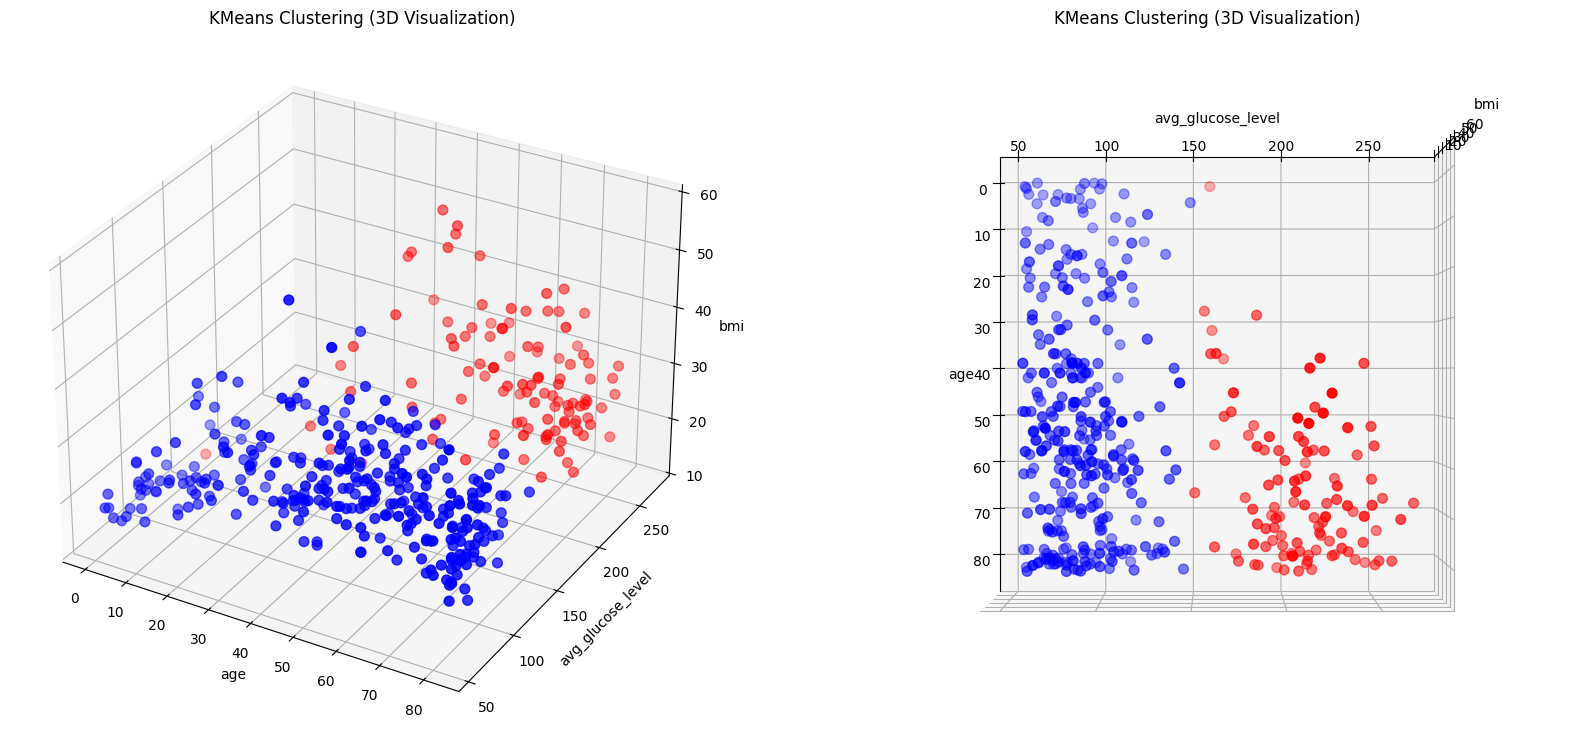

In [20]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from graphs_module import cluster_3d, cluster_pca

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

df = X.copy()
df['stroke'] = y

df['cluster'] = kmeans.labels_

features = ['age', 'avg_glucose_level', 'bmi']
colors = {0: 'blue', 1: 'red', 2: 'green', 3: 'purple', 4: 'orange', 5: 'black', 6: 'brown', 7: 'pink', 8: 'gray', 9: 'olive'}

cluster_3d(X, y, kmeans.labels_, ["age", "avg_glucose_level", "bmi"], colors)

In [21]:
cluster_means = df.groupby('cluster')['stroke'].mean().sort_values(ascending=False)

high_risk_clusters = cluster_means.index.tolist()

print("Clusters ordered by stroke mean (high to low):", high_risk_clusters)


Clusters ordered by stroke mean (high to low): [1, 0]


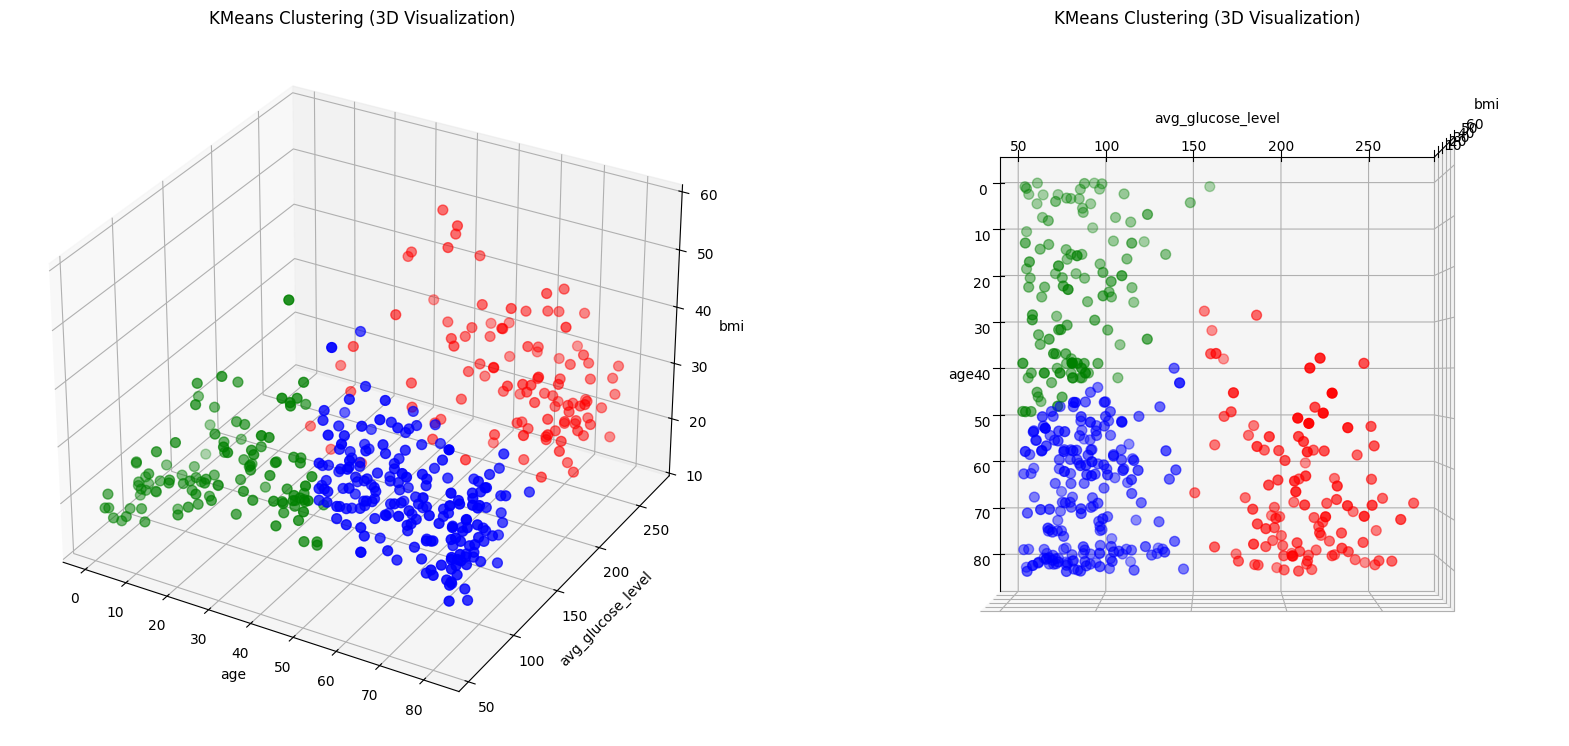

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

cluster_3d(X, y, kmeans.labels_, ["age", "avg_glucose_level", "bmi"], colors)

## PCA i visualització

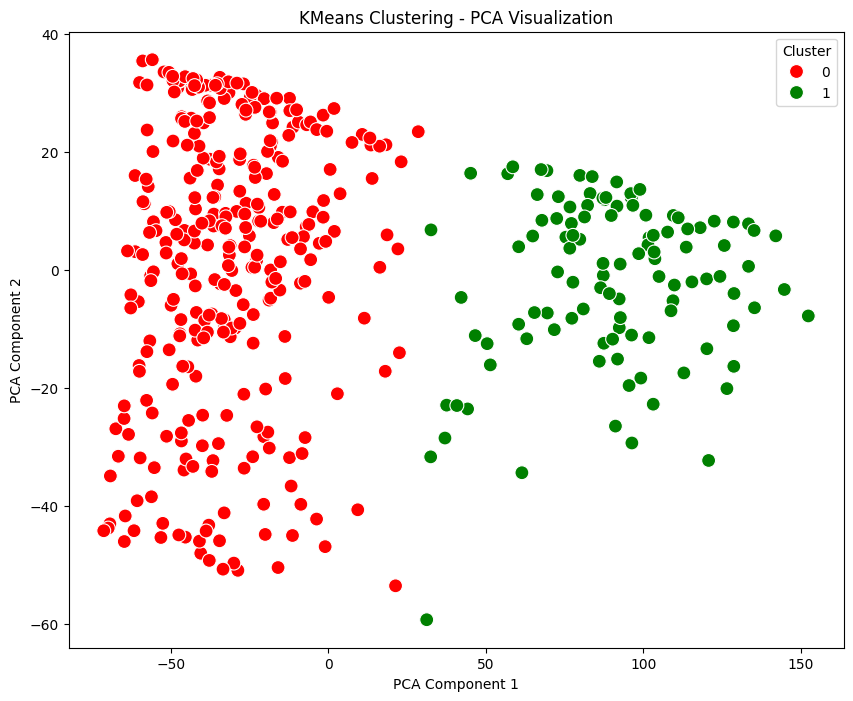

In [23]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
"""
# Imprimir les dues components principals
components = pca.components_
features = X.drop('cluster', axis=1).columns
pca_df = pd.DataFrame(components, columns=features, index=[f'PC{i+1}' for i in range(components.shape[0])])
print(pca_df)
"""
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['cluster'], palette={0: 'red', 1: 'green'}, s=100)

plt.title('KMeans Clustering - PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.legend(title="Cluster")
plt.show()

## t-SNE i visualització

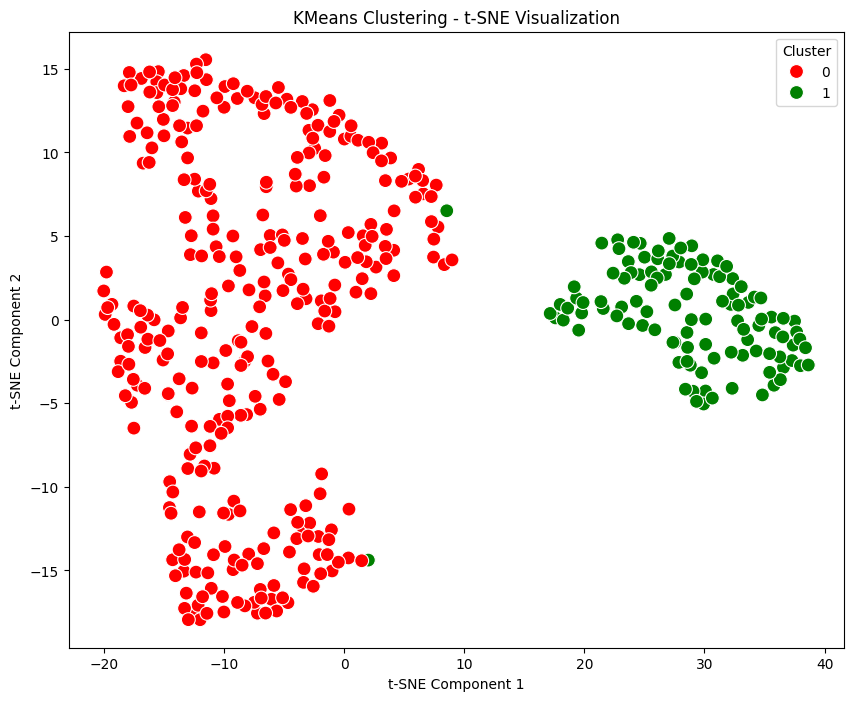

In [25]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter_tsne = sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['cluster'], palette={0: 'red', 1: 'green'}, s=100)

plt.title('KMeans Clustering - t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.legend(title="Cluster")
plt.show()